![example](images/director_shot.jpeg)

## Microsoft Film Analysis

**Author:** Andre Layton
***

-Read through markdowns for grammar/mistakes/update information!

-Edit Conclusions

## Overview

  Microsoft is creating a new movie studio division in an effort to compete with other big companies, like Apple and Amazon, that have been successfully putting out diverse media content. This project aims to analyze movie data from various sources and recommend the best type of film to create for the studio's initial content. The main focus behind the analysis is seeing which films are best to begin creating by calculating and comparing both the Domestic and Worldwide returns on investment (ROI), both measured in percentages. During the course of the analysis, the comparison shifted from ROIs to average ROIs from the datasets due to outliers. The results showed that while a majority of the movies from Box Office Mojo's movie budget dataset fell under Action, Comedy, Drama, or Adventure genres, which are the four most frequent genres in order, War and Mystery movies yielded the highest average ROI, both domestically and worldwide. However, those genres were lacking enough records to draw conclusions from, shown through the high error bars in both visuals for each genre; as such, if we focus on the genres with low error margins (like the top four mentioned earlier), our results recommend Adventure as the best genre to begin with for both domestic and global success and profit. Adventure films, on average, require a \\$75 million budget, but I am suggesting \\$100 million, at minimum, upwards to approximately \\$170 million, for both domestic and foreign success. 

## Business Problem

Microsoft has created a movie studio; however, the executives are stuck on what type of content to begin creating and investing in. In order to compete with companies who have been dominating the space thus far, I am looking at the film genres that provide the highest return on investment (ROI), both domestically and globally, in order to recommend the best type of film for Microsoft to begin creating. The significance in selecting a genre with a high ROI lies in the impact it could have on future films - if the genre we recommend produces a high ROI for Microsoft, it encourages investors and invites conversations for further film production. It also assures the executives that Microsoft can compete in this space/industry.

## Data Understanding

In order to calculate both ROI levels, data from The Numbers website as well as data from IMDB is necessary. The dataset from The Numbers displays the budgets, domestic gross, worldwide gross, and release dates of various movies, ordered by budget in descending order. The data from The Numbers will be crucial in calculating the ROI, which is equivalent to the gross income divided by the cost of the investment, or the budget in this case. The data located in IMDB is located in a SQLite database with various tables, one of which is "movie_basics", which contains the names, genres, and other details for each movie in the database. Despite the need to calculate the ROI, the independent variable we are interested in is the movie genre and which genres yield the higher ROI rate.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
# Read movie_budgets.csv file
movie_budgets_df = pd.read_csv('tn.movie_budgets.csv.gz')

In [3]:
# Use .info() method to list preliminary information
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# List the first 20 records
movie_budgets_df.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [5]:
# Create a connection for the IMDB database
conn = sqlite3.connect('im.db')

# Use .info() method after making a query to select all fields in the movie_basics table
pd.read_sql("""
SELECT *
FROM movie_basics
""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
# Query and list the first 20 items
pd.read_sql("""
SELECT *
FROM movie_basics
""", conn).head(20)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


## Data Preparation

In order to combine both dataframes and create one single dataset for analysis, I start preparing the movie_budgets data first. I drop any fields I do not need (i.e., 'id') before I clean up the names of the remaining features. 

In [7]:
# Let's clean up the movie_budgets dataframe first to fit what we need for analysis:

# Start by dropping any columns we don't need, like the id column
movie_budgets_df2 = movie_budgets_df.drop('id', axis=1)

# Clean up the column names as well
new_column_names = {'release_date': 'Release Date', 'movie':'Movie Name', 'production_budget': 'Production Budget', 'domestic_gross': 'Domestic Gross',
                    'worldwide_gross': 'Worldwide Gross'}
budgets_df3 = movie_budgets_df2.rename(columns=new_column_names)

Based on the information given by the .info() method, the next step is to change the data type of the last three columns. We'll need them as they are numeric and key to statistical analysis later in our exploratory process. In order to convert these fields to integer types, the values for these fields must be transformed to fit conversion criterion. The .head() method also reveals that there are movie titles that contain apostrophes (') that did not fully convert, and will need further data munging. 

In [8]:
# Change the data type of the last three columns from 'object' to 'int' for future statistical analysis
numeric_columns = ['Production Budget', 'Domestic Gross', 'Worldwide Gross']
for column in numeric_columns:
    budgets_df3[column] = budgets_df3[column].map(lambda x: int(x.replace('$', '').replace(',', '')))

# Clean up the movie names, since that will be the field we use to link the movie_basics table shortly
budgets_df3['Movie Name'] = budgets_df3['Movie Name'].map(lambda x: x.replace('â', '\''))
print(budgets_df3.info())
budgets_df3.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Release Date       5782 non-null   object
 1   Movie Name         5782 non-null   object
 2   Production Budget  5782 non-null   int64 
 3   Domestic Gross     5782 non-null   int64 
 4   Worldwide Gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 226.0+ KB
None


,Release Date,Movie Name,Production Budget,Domestic Gross,Worldwide Gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,"May 24, 2007",Pirates of the Caribbean: At World's End,300000000,309420425,963420425
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923


Next step is to clean up the SQL table to fit for merging with our refined movie budgets dataset. Fortunately, this table doesn't require much work - only renaming the field names. Once that's complete, we merge the two together using the Movie Name field. After joining both tables, we begin cleaning up our final DataFrame by creating a new column representing whether the movie titles match to ensure the genres listed accurately describe the associated movie in each record. We'll remove those records to refine the dataset.

In [9]:
# Next, we'll clean up the SQL table to fit our needs:

# First, rename and keep the columns we need (i.e., primary_title, original_title, genres)
movie_basics_df = pd.read_sql("""
SELECT primary_title AS 'Movie Name', original_title AS 'Original Title', genres AS Genres, runtime_minutes AS 'Runtime'
FROM movie_basics
""", conn)

# Next, join the two DataFrames together
final_df = pd.merge(budgets_df3, movie_basics_df, on='Movie Name')

# Create a new column to identify which records are incorrectly matched
final_df.loc[final_df['Movie Name'] == final_df['Original Title'], 'Titles Match'] = True
final_df.loc[final_df['Movie Name'] != final_df['Original Title'], 'Titles Match'] = False
incorrect_pairs = final_df[final_df['Titles Match'] == False]

# Find any missing values in the Original Title & Genres fields
incorrect_pairs['Original Title'].isna().loc[incorrect_pairs['Original Title'].isna() == True]
incorrect_pairs['Genres'].isna().loc[incorrect_pairs['Genres'].isna() == True]

# Decision: Remove records
final_df = final_df.dropna()

In order to locate any other records with mismatched movie titles, we create a function to change all movie names with numbers in the string to numeric form to bring a little more consistency in the movie names, and allow us to retain a few more records. We drop all duplicates and clean up the Genres column as well. Our final step for analysis, and vital for the next phase of this study, is to create both ROI columns - Domestic and Worldwide - using the pandas .divide() method. 

In [10]:
# Change written numbers in the Original Title and Movie Name fields to numeric form
def word_to_number(title):
    words = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine", "Ten"]

    for word in words:
        if word in title:
            start = title.index(word)
            end = start + len(word)
            extracted_word = title[start:end]
            title = title.replace(word, str(words.index(extracted_word)))
    return title

final_df['Original Title'] = final_df['Original Title'].map(lambda x: word_to_number(x))
final_df['Movie Name'] = final_df['Movie Name'].map(lambda x: word_to_number(x))

# Rerun the earlier code to find identical titles in Title Match column
final_df.loc[final_df['Movie Name'] == final_df['Original Title'], 'Titles Match'] = True
incorrect_pairs = final_df[final_df['Titles Match'] == False]

# Drop all records in the incorrect_pairs object from the combined dataset
final_df = final_df.loc[final_df['Titles Match'] == True]

# Drop duplicates
final_df = final_df.drop_duplicates("Movie Name")

# Clean up the Genres field by splitting each genre after the comma
final_df['Genres'] = final_df['Genres'].map(lambda x: x.split(','))

# Calculate and create a column labeled Domestic ROI (%)
final_df['Domestic ROI (%)'] = (final_df['Domestic Gross'].divide(final_df['Production Budget'])) * 100
    
# Next, calculate and create a column labeled Worldwide ROI (%)
final_df['Worldwide ROI (%)'] = (final_df['Worldwide Gross'].divide(final_df['Production Budget'])) * 100

final_df.head(15)

,Release Date,Movie Name,Production Budget,Domestic Gross,Worldwide Gross,Original Title,Genres,Runtime,Titles Match,Domestic ROI (%),Worldwide ROI (%)
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,"[Action, Adventure, Fantasy]",136.0,True,58.710150,254.667286
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Dark Phoenix,"[Action, Adventure, Sci-Fi]",113.0,True,12.217814,42.789243
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,"[Action, Adventure, Sci-Fi]",141.0,True,138.840250,424.384139
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,"[Action, Adventure, Sci-Fi]",149.0,True,226.271827,682.711400
5,"Nov 17, 2017",Justice League,300000000,229024295,655945209,Justice League,"[Action, Adventure, Fantasy]",120.0,True,76.341432,218.648403
6,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Spectre,"[Action, Adventure, Thriller]",148.0,True,66.691392,293.206974
7,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,The Dark Knight Rises,"[Action, Thriller]",164.0,True,162.959672,394.341491
8,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,Solo: A Star Wars Story,"[Action, Adventure, Fantasy]",135.0,True,77.733641,142.964126
9,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,The Lone Ranger,"[Action, Adventure, Western]",150.0,True,32.473496,94.546224
10,"Mar 9, 2012",John Carter,275000000,73058679,282778100,John Carter,"[Action, Adventure, Sci-Fi]",132.0,True,26.566792,102.828400


## Data Modeling

The next phase of this analysis is to visualize the data. The first few visuals will plot both ROIs based on each genre within our dataset. Unfortunately, some records contain multiple genres listed and some only have one. I'll need to revise the plan of action a little further by only retaining the first genre listed. We'll take a look at the final dataset's makeup and statistical breakdown.

In [11]:
# Now let's get a count of all the genres in this dataframe:

# Clean up the Genres field by keeping the first one listed
final_df['Genres'] = final_df['Genres'].transform(lambda x: x[0])
print(final_df['Genres'].value_counts())
final_df.head(15)

Action         511
Drama          426
Comedy         395
Adventure      196
Biography      154
Documentary    130
Horror         123
Crime          118
Thriller        19
Animation       16
Sci-Fi          11
Family           8
Fantasy          6
Romance          5
Mystery          5
Musical          3
Music            3
War              2
Name: Genres, dtype: int64


,Release Date,Movie Name,Production Budget,Domestic Gross,Worldwide Gross,Original Title,Genres,Runtime,Titles Match,Domestic ROI (%),Worldwide ROI (%)
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,Action,136.0,True,58.710150,254.667286
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Dark Phoenix,Action,113.0,True,12.217814,42.789243
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,Action,141.0,True,138.840250,424.384139
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,Action,149.0,True,226.271827,682.711400
5,"Nov 17, 2017",Justice League,300000000,229024295,655945209,Justice League,Action,120.0,True,76.341432,218.648403
6,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Spectre,Action,148.0,True,66.691392,293.206974
7,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,The Dark Knight Rises,Action,164.0,True,162.959672,394.341491
8,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,Solo: A Star Wars Story,Action,135.0,True,77.733641,142.964126
9,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,The Lone Ranger,Action,150.0,True,32.473496,94.546224
10,"Mar 9, 2012",John Carter,275000000,73058679,282778100,John Carter,Action,132.0,True,26.566792,102.828400


In [12]:
# Use the .describe() method to preview statistical information about the dataset
final_df.describe()

,Production Budget,Domestic Gross,Worldwide Gross,Runtime,Domestic ROI (%),Worldwide ROI (%)
count,2.131000e+03,2.131000e+03,2.131000e+03,2131.000000,2131.000000,2131.000000
mean,3.707578e+07,4.588458e+07,1.118688e+08,101.582356,202.530208,375.789522
std,5.031990e+07,7.576634e+07,2.093929e+08,22.426409,783.541402,1393.798722
min,1.400000e+03,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,5.000000e+06,8.577655e+05,2.852167e+06,90.000000,15.495235,39.650926
50%,1.900000e+07,1.898579e+07,3.270044e+07,101.000000,77.725400,168.910110
75%,4.500000e+07,5.577662e+07,1.153708e+08,114.000000,182.772138,364.393770
max,4.106000e+08,7.000596e+08,2.208208e+09,180.000000,22764.410000,41656.474000


According to the breakdown above, the top 3 genres - Action, Drama, Comedy - have far more records than the others; although, Adventure has a respectable amount of records, as well. The other genres have far few records and inspire low confidence in their results and any conclusions we can draw from them. We should see that displayed in the following visuals. The statistical breakdown above shows the presence of outliers in the numerical data, but also gives us a better idea of how to view and focus our analysis. For Domestic ROI, we will plot only those under 1000%, to refine and keep out outliers. 

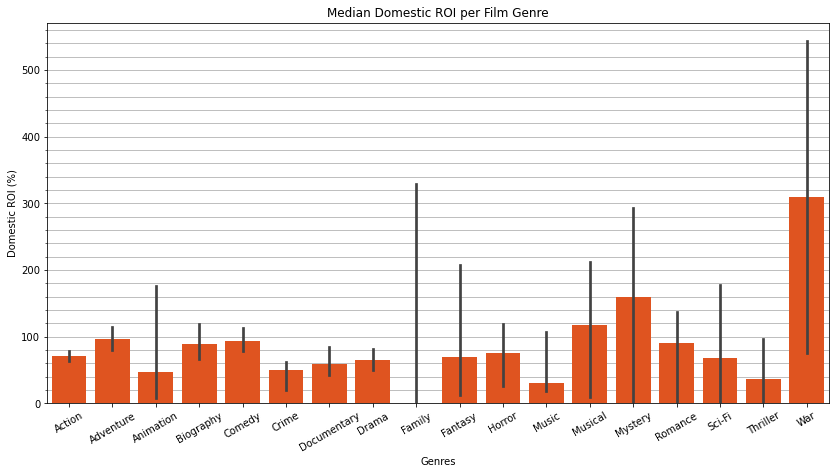

In [13]:
# We'll begin comparing and plotting each genre's median Domestic ROI

# First, let's import the median module from numpy and filter out the outliers from the dataset
from numpy import median
final_df2 = final_df[final_df['Domestic ROI (%)'] <= 1000]

# Now, visualize Genres vs. median Domestic ROI
fig, ax = plt.subplots(figsize=(14, 7))
ax.tick_params(axis='x', labelrotation=30)

# Plotting major and minor gridlines to figure
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minor_locator)
ax.set_axisbelow(True)
plt.grid(which='both')

# Set title and plot graph
ax.set_title('Median Domestic ROI per Film Genre')
sns.barplot(data=final_df2.sort_values('Genres'), y='Domestic ROI (%)', x='Genres', estimator=median, color='orangered');

Now this plot tells us quite a bit - despite Mystery and Musical movies yielding the highest median Domestic ROIs, their error bars in relation are also quite high. Those high error bars are probably due to films with very low budgets that yielded major success in relation. Therefore, we'll focus on the top 4 genres - Action, Comedy, Drama, and Adventure. Through this focus, we see that Adventure and Comedy movies produce the highest & second-highest median Domestic ROIs, respectively. 

However, Microsoft is big enough to compete with other big tech giants like Apple and Amazon, who are dominating on a global level. As such, to gain further insight, we'll plot the median Worldwide ROI below. For Worldwide ROI, we will filter our dataset by only focusing on records whose Worldwide ROI is below 2000%, or double of what we selected for Domestic ROI.

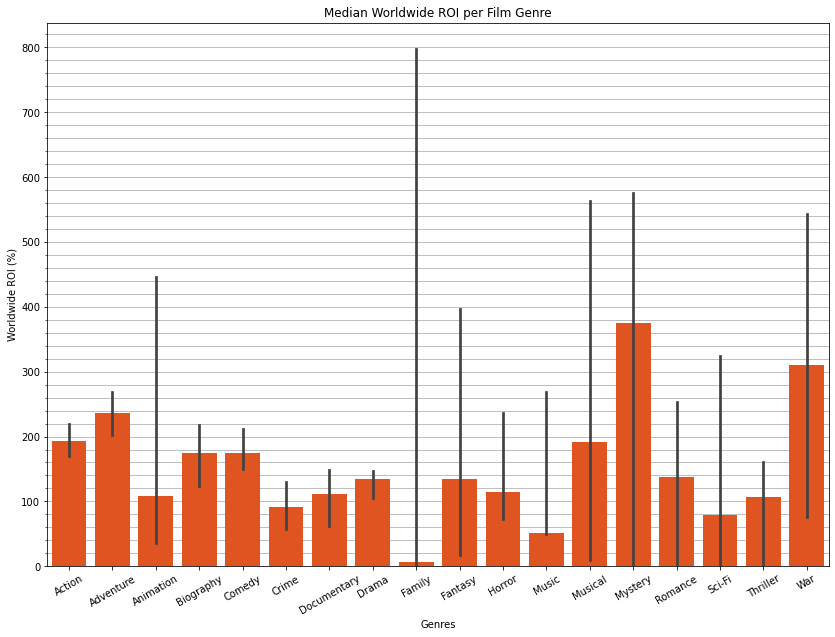

In [17]:
final_df3 = final_df[final_df['Worldwide ROI (%)'] <= 2000]

# Now, visualize Genres vs. median Worldwide ROI
from numpy import median
fig, ax = plt.subplots(figsize=(14,10))

# Plotting major and minor gridlines to the figure
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minor_locator)
ax.set_axisbelow(True)
plt.grid(which='both')
ax.tick_params(axis='x', labelrotation=30)

# Set title and plot graph
ax.set_title('Median Worldwide ROI per Film Genre')
sns.barplot(data=final_df3.sort_values('Genres'), y='Worldwide ROI (%)', x='Genres', estimator=median, color='orangered');

We see somewhat of a similar effect, where Adventure holds the highest median ROI - a little under 240% - on a worldwide level; however, Action films follow after, short of 200%, and leaving Comedy in third, capped at about 180%. We also find that the other genres contain high margins of error, which instills little confidence in their results. 

If we focus the remainder of the analysis on a worldwide scope, as well as isolating the top four genres, which have displayed low error margins and more precise data, we can gain a better picture by including the outliers and plotting the average Worldwide ROI to come to a final answer. 

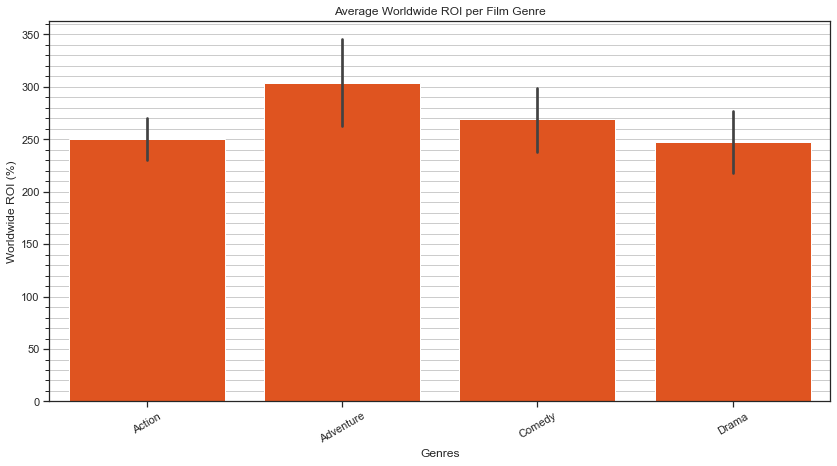

In [37]:
# Focus the analysis on the top four genres in the focused Worldwide dataset
top_4_genres = final_df['Genres'].value_counts()[:4].index
final_df3_by_top4 = final_df3[final_df3['Genres'].isin(list(top_4_genres))]

# Now, visualize Genres vs. average Worldwide ROI
fig, ax = plt.subplots(figsize=(14, 7))
ax.tick_params(axis='x', labelrotation=30)

# Plotting major and minor gridlines to figure
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(5)
ax.yaxis.set_minor_locator(minor_locator)
ax.set_axisbelow(True)
plt.grid(which='both')

# Set title and plot graph
ax.set_title('Average Worldwide ROI per Film Genre')
sns.barplot(data=final_df3_by_top4.sort_values('Genres'), y='Worldwide ROI (%)', x='Genres', color='orangered');

Once again, Adventure films hold the highest average ROI (including outliers), and support the conclusion that Adventure films are the best for production and success. Adventure films are estimated to yield over 300% in budget returns, worldwide - more than triple the costs! The visual also puts an end to the comparison between Comedy and Action films, with Comedy films edging higher towards 270%, while Action films break close to 250%. This is significant in the case where we might want to merge multiple genres for the initial content, and need an understanding on both market demographics. 

Now that we have our genre determined, the next step is to estimate production costs and estimate an investment budget. The following visuals include a boxplot of the top four genres and their production costs among the final dataset. 

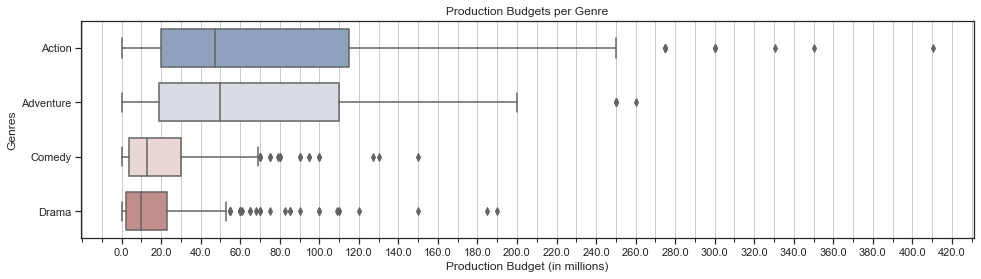

In [41]:
# Focus the analysis on the top four genres
final_df_by_top4 = final_df[final_df['Genres'].isin(list(top_4_genres))]

# Next visual: Genres and their Production Budgets
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(16, 4))

# X axis formatter
# Customizing X-axis scale
def million_formatter(x, pos):
    return str(round(x / 1e6, 1))

ax.xaxis.set_major_formatter(million_formatter)
ax.set_xticks(range(0, 480000000, 20000000))

# Setting minor tick marks 
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='both')

# Plotting boxplot using Seaborn & setting labels
sns.boxplot(x="Production Budget", y="Genres", data=final_df_by_top4.sort_values('Genres'),
            width=.7, palette="vlag", ax=ax).set(title='Production Budgets per Genre')
ax.set_xlabel('Production Budget (in millions)');

The boxplot above gives a whole, statistical view of the final dataset's production budgets broken down per genre. Outliers included, Action and Adventure films displayed a wider range and higher ceiling in their budgets. Despite Action movies having a higher maximum (including more extreme outliers), Adventure films have the higher median budget and will require more investment (estimated at approximately \\$5 million more). Comedy films, however, have a median budget between $10-20 million, far less than both Action & Adventure, estimated at \\$45 and \\$50 million, respectively. 

The following visual displays the average budget per genre, and will give further insight into costs and investment estimations.

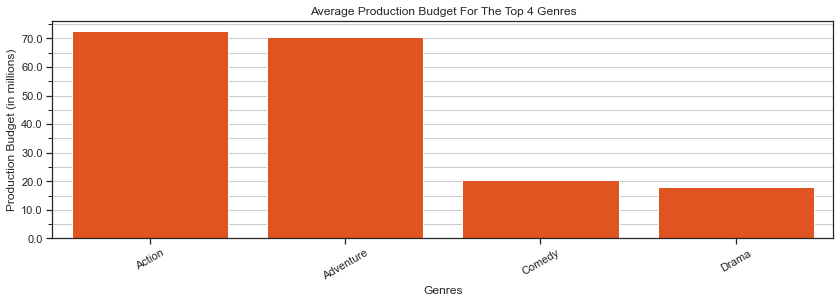

In [39]:
# Plot the average production budget for the top four genres
fig, ax = plt.subplots(figsize=(14, 4))
ax.ticklabel_format(style='plain', axis='both')
ax.tick_params(axis='x', labelrotation=30)
ax.yaxis.set_major_formatter(million_formatter)
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(2)
ax.yaxis.set_minor_locator(minor_locator)
plt.grid(which='both')
ax.set_title('Average Production Budget For The Top 4 Genres')
sns.barplot(data=final_df_by_top4.sort_values('Genres'), y="Production Budget", x="Genres", ax=ax, ci=False, color='orangered')
ax.set_ylabel('Production Budget (in millions)');

The chart above further confirms some of our previous deductions, only with outliers included. First, Action & Adventure films will require a high average investment of approximately \\$70 million. Action has the highest average budget, as expected, as outliers are considered in the analysis. Although, Comedy films only need $20 million on average to produce. 

Now that we have an idea on the initial investment, we'll continue to build a plan based on the Worldwide ROI. The next visuals will aid in deducing how much is necessary for certain global success. 

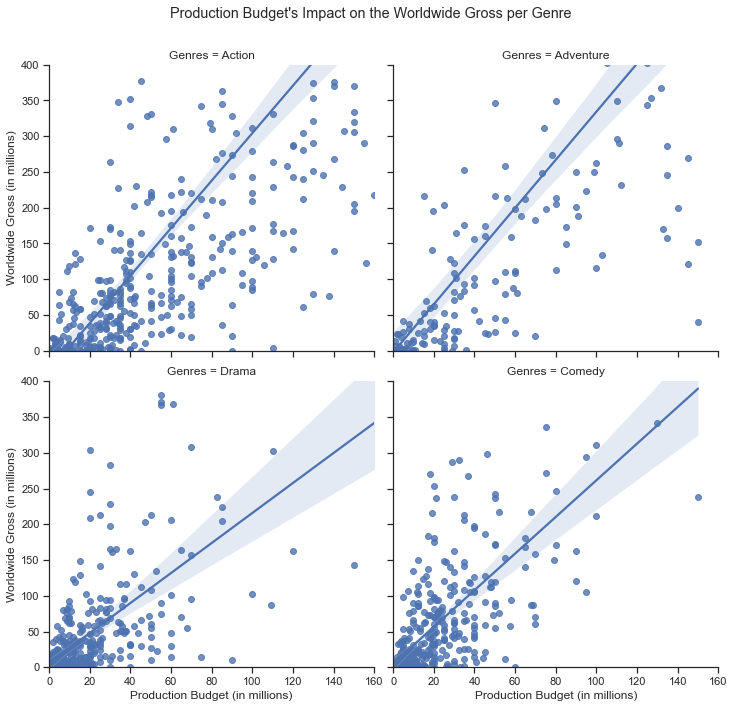

In [38]:
# Plot linear regression model against Worldwide Gross now
reg_model2 = sns.lmplot(data=final_df3_by_top4, x='Production Budget', y='Worldwide Gross', col='Genres', col_wrap=2)

reg_model2.set_xlabels('Production Budget (in millions)')
reg_model2.set_ylabels('Worldwide Gross (in millions)')
reg_model2.fig.subplots_adjust(top=.9)
reg_model2.fig.suptitle('Production Budget\'s Impact on the Worldwide Gross per Genre')
reg_model2.set(xlim=(0, 1.6e8), ylim=(0, 4e8))
reg_model2.set_xticklabels([0, 20, 40, 60, 80, 100, 120, 140, 160])
reg_model2.set_yticklabels([0, 50, 100, 150, 200, 250, 300, 350, 400]);

The plots above confirm our suggestion on Adventure films being the best type of movie to begin making. Globally, the regression line shows gross success accumulating at a high rate, thus requiring less investment compared to other genres. Therefore, a budget, for example, of \\$70 million is estimated to yield a little more than \\$150 million - more than double the investment. However, I am suggesting a minimum budget of $100 million, which is estimated to produce three times the investment; and upwards to approximately \\$140 million to begin looking at possibly return four times the investment, based on the visuals above. 

Now that we have the budget plan determined, let's get more technical and confirm the runtime of the starting film. This is important in order to determine production details and further costs. 

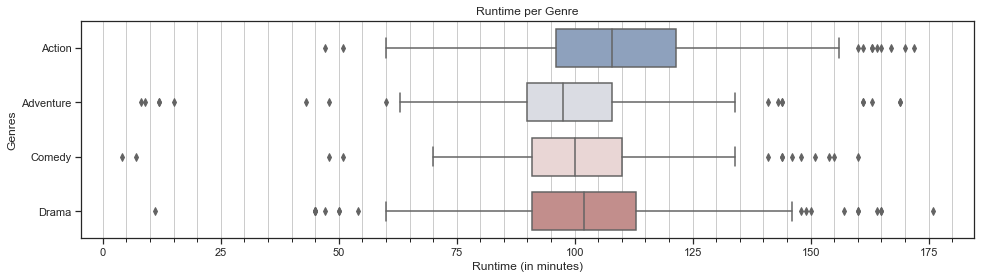

In [45]:
# Next visual: Genres and Runtime
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(16, 4))

# Setting minor tick marks 
from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locator)
plt.grid(which='both')

# Plotting boxplot using Seaborn & setting labels
sns.boxplot(x="Runtime", y="Genres", data=final_df_by_top4.sort_values('Genres'),
            width=.7, palette="vlag", ax=ax).set(title='Runtime per Genre')
ax.set_xlabel('Runtime (in minutes)');

Fortunately, Adventure films has the lowest median among the top four genres in the dataset, estimated to be between 95 and 100 minutes. They also have the lowest ceiling, which suggests that Adventure films typically have low runtimes and less studio time to invest in. I am suggesting we aim for a runtime between 95 and 110 minutes, which is a little over the 75th percentile of records. If we merge both Adventure and Comedy genres, this runtime range still applies. 

In [47]:
# Close database connection
conn.close()

## Evaluation

Based on the statistical analysis and visual results, Adventure movies would be the best genre to begin creating for potential domestic and worldwide success, predicated on the film's return on investment (ROI). Other genres to consider are Comedy movies, which held the second-steepest regression line for domestic gross and highest average domestic ROI. Of course, these findings are formulated assuming that we only consider the genres with low margins of error (depicted by the black bars illustrated in the first few plots above). Musicals and War movies produced high median ROIs; however, that is primarily due to the fact that there were few records for those genres, among others. As such, the results were susceptible to any outliers that may exist (the high error margin bars in the bar plots portray this effect). Therefore, we focused on the top four genres - Action, Adventure, Comedy, and Drama - that had a high number of records. There was more confidence in their results, exhibited by the low error margins. The models all show and support Adventure films as the best content to begin creating for strong returns on investment. The next few models begin to look at how much the film will cost - taking into account both average budget and projected gross, both domestically and worldwide. Adventure films, on average, require \\$75 million, the highest among the top four genres, but will need at least \\$100 million to begin seeing profit and higher ROIs. 

I am confident these results would generalize beyond the data used for analysis, assuming the movies were assigned individual genres. However, if multiple genres characterize the films, the analysis would need to be modified and refined to include these assumptions. I would further suggest merging genres (e.g., Adventure and Comedy) in order to generate higher profits. Fortunately, ROI is a great measure of film success and can lead to further film development. 

## Conclusions

Here are my recommendations based on my analysis: 
1. **START WITH ADVENTURE-COMEDY FILMS** Adventure films generate the highest median worldwide return on investment, among the top four genres. We focused our analysis to those four genres due to a lack of records for the other genres, and their susceptibility to outliers (e.g., low budget films that found major success), to confidently include them in the analysis. As such, Adventure films were the best choice to begin with, and is estimated to produce both the highest median and average worldwide returns - suggesting the film will make enough to cover production costs and even generate profit. I would further suggest merging genres with Comedy for the screenplay, which will allow us to draw from different demographics and markets to gain success/following from. Therefore, an Adventure-Comedy film. 

2. **BUDGET SUGGESTIONS** According to the average budget and Worldwide ROI visuals above, prepare to spend a minimum of \\$70 million on this film in order to double the return on investment. However, I am suggesting a budget plan between \\$100-140 million, in order to make, approximately, three times the budget at the minimum and a ceiling projected at quadruple the investment. 

3. **RUNTIME SUGGESTIONS** I am suggesting a minimum runtime of approximately 95 minutes for the Adventure film. However, if we follow my earlier suggestion regarding merging genres, an Adventure-Comedy film would require a runtime between 95-110 minutes. 

The analysis above, as mentioned earlier, is formulated assuming each movie has one individual genre that defines it. Unfortunately, films can be characterized in multiple ways/genres, and the analysis would need to be revise with that factored in, in order to solve the business problem when presented with those possible datasets. By doing so, we'll be able to reach a wider audience, and further market the film for success. To further improve this project, I could  also analyze ratings, see how that compares with ROI success, and observe any changes in results (or any confirmations).